In [1]:
from setup import *

# 1. Load data

## 1.1 PCAWG data set
Activitiy

In [2]:
activity = pd.read_csv("./Data/WGS_PCAWG.activities.csv")
activity.index = (activity['Cancer Types'] + "::" + activity['Sample Names']).values

SBS sig

In [3]:
SBS_sig = pd.read_csv("./Data/SBS_signatures.csv")
SBS_sig = SBS_sig.iloc[:, 2:].copy()

Creat dict object for signatures with known aetiology:

In [4]:
sig_aetiology_dict = {"Clock-like":["SBS1"], 
                      "APOBEC":["SBS2","SBS13"],
                      "HR deficiency" : ["SBS3"], 
                      "Tobacco" : ["SBS4", "SBS29"], 
                      "MMR deficiency" : ["SBS6",'SBS14',"SBS15","SBS20", "SBS21","SBS26", "SBS44"],
                      "POLE" : ["SBS10a", "SBS10b"],
                      "UV light" : ["SBS7a", "SBS7b","SBS7c","SBS7d"],
                      'ROS damage':['SBS18'],
                      "BER deficiency" : ["SBS30", "SBS36"],
                      "Treatment exposure" : [ "SBS31", "SBS32", "SBS35"],
                      'Mutagen exposure' : ["SBS22", 'SBS24', "SBS42"]}
aetiology_list = list(sig_aetiology_dict.keys())

Mutational profiles

In [5]:
profiles = pd.read_csv("./Data/WGS_PCAWG.96.csv")
profile_values = profiles.iloc[:,2:]

In [6]:
nonT2C_index = profiles['Mutation type'].values != 'T>C'
SBS_sig_80c = SBS_sig.loc[nonT2C_index,:].copy()
SBS_sig_80c = (SBS_sig_80c/SBS_sig_80c.sum())

## 1.2 Simulated and corrected unrepaired-FFPE samples

In [7]:
simulated_df_unrepaired_10_4 = pd.read_csv("./Data/simulated_PCAWG_FFPE_unrepaired.csv")
simulated_df_unrepaired_10_4.head(2)

,Biliary-AdenoCA::SP117655,Biliary-AdenoCA::SP117556,Biliary-AdenoCA::SP117627,Biliary-AdenoCA::SP117775,Biliary-AdenoCA::SP117332,Biliary-AdenoCA::SP117712,Biliary-AdenoCA::SP117017,Biliary-AdenoCA::SP117031,Biliary-AdenoCA::SP117759,Biliary-AdenoCA::SP117621,...,Uterus-AdenoCA::SP94540,Uterus-AdenoCA::SP95222,Uterus-AdenoCA::SP89389,Uterus-AdenoCA::SP90503,Uterus-AdenoCA::SP92460,Uterus-AdenoCA::SP92931,Uterus-AdenoCA::SP91265,Uterus-AdenoCA::SP89909,Uterus-AdenoCA::SP90629,Uterus-AdenoCA::SP95550
0,278,123,115,229,62,207,63,210,252,184,...,128,247,105,124,262,147,409,112,258,182
1,148,57,71,124,38,140,56,102,187,132,...,90,168,59,66,269,75,255,79,188,137


In [8]:
unrepaired_profiles_corrected = pd.read_csv("./Data/unrepaired_profiles_corrected.csv", sep = "\t")
unrepaired_profiles_corrected.head(1)

,MutationType,Biliary-AdenoCA::SP117655,Biliary-AdenoCA::SP117556,Biliary-AdenoCA::SP117627,Biliary-AdenoCA::SP117775,Biliary-AdenoCA::SP117332,Biliary-AdenoCA::SP117712,Biliary-AdenoCA::SP117017,Biliary-AdenoCA::SP117031,Biliary-AdenoCA::SP117759,...,Uterus-AdenoCA::SP94540,Uterus-AdenoCA::SP95222,Uterus-AdenoCA::SP89389,Uterus-AdenoCA::SP90503,Uterus-AdenoCA::SP92460,Uterus-AdenoCA::SP92931,Uterus-AdenoCA::SP91265,Uterus-AdenoCA::SP89909,Uterus-AdenoCA::SP90629,Uterus-AdenoCA::SP95550
0,C>A@ACA,266,112,103,217,51,196,51,198,239,...,117,235,94,112,249,136,397,99,245,170


In [9]:
simulated_df_unrepaired_10_4_80c = simulated_df_unrepaired_10_4.loc[nonT2C_index,:].copy()
unrepaired_profiles_corrected_80c = unrepaired_profiles_corrected.loc[nonT2C_index,:].copy()

## 1.3 Simulated and corrected repaired-FFPE samples

In [10]:
simulated_df_repaired_10_4 = pd.read_csv("./Data/simulated_PCAWG_FFPE_repaired.csv")
simulated_df_repaired_10_4.head(2)

,Biliary-AdenoCA::SP117655,Biliary-AdenoCA::SP117556,Biliary-AdenoCA::SP117627,Biliary-AdenoCA::SP117775,Biliary-AdenoCA::SP117332,Biliary-AdenoCA::SP117712,Biliary-AdenoCA::SP117017,Biliary-AdenoCA::SP117031,Biliary-AdenoCA::SP117759,Biliary-AdenoCA::SP117621,...,Uterus-AdenoCA::SP94540,Uterus-AdenoCA::SP95222,Uterus-AdenoCA::SP89389,Uterus-AdenoCA::SP90503,Uterus-AdenoCA::SP92460,Uterus-AdenoCA::SP92931,Uterus-AdenoCA::SP91265,Uterus-AdenoCA::SP89909,Uterus-AdenoCA::SP90629,Uterus-AdenoCA::SP95550
0,400,235,217,335,174,307,194,318,382,281,...,241,341,206,240,387,264,532,237,376,292
1,151,57,72,125,36,139,55,102,188,132,...,90,168,59,65,268,75,257,79,188,139


In [11]:
repaired_profiles_corrected = pd.read_csv("./Data/repaired_profiles_corrected.csv", sep = "\t")
repaired_profiles_corrected.head(1)

,MutationType,Biliary-AdenoCA::SP117655,Biliary-AdenoCA::SP117556,Biliary-AdenoCA::SP117627,Biliary-AdenoCA::SP117775,Biliary-AdenoCA::SP117332,Biliary-AdenoCA::SP117712,Biliary-AdenoCA::SP117017,Biliary-AdenoCA::SP117031,Biliary-AdenoCA::SP117759,...,Uterus-AdenoCA::SP94540,Uterus-AdenoCA::SP95222,Uterus-AdenoCA::SP89389,Uterus-AdenoCA::SP90503,Uterus-AdenoCA::SP92460,Uterus-AdenoCA::SP92931,Uterus-AdenoCA::SP91265,Uterus-AdenoCA::SP89909,Uterus-AdenoCA::SP90629,Uterus-AdenoCA::SP95550
0,C>A@ACA,258,97,78,176,42,175,61,175,222,...,101,204,72,100,209,130,389,82,219,153


In [12]:
simulated_df_repaired_10_4_80c = simulated_df_repaired_10_4.loc[nonT2C_index,:].copy()
repaired_profiles_corrected_80c = repaired_profiles_corrected.loc[nonT2C_index,:].copy()

# 2. Compare inferred signature activities from uncorrected FFPE and corrected FFPE profiles

+ We are interested in decomposition results on uncorrected FFPE and corrected profiles.
+ We use the decomposition results from real biological profile as a control.

## 2.1 Infer activities from FFPE samples

We infer mutational signature activities for three profiles in each sample:
+ Biological profile;
+ Corrected FFPE profile;
+ Uncorrected FFPE profile.

We also compute the reconstruction accuracy between the real biological profiles to the reconstructed profiles from above three inference.

### 2.1.1 For unrepaired FFPEs

Read well-corrected PCAWG samples (correction accuracy above 0.9)

In [13]:
well_corrected_samples_unrepaired_df = pd.read_csv("./Data/well_corrected_unrepaired_FFPE.csv", sep = "\t")
well_corrected_samples_unrepaired = well_corrected_samples_unrepaired_df['Samples'].values
len(well_corrected_samples_unrepaired)

1770

In [14]:
all_act_sig = []
samples = []
true_activities = []
uncorrected_activities = []
corrected_activities = []

reconstruction_accuracy_unrepaired_biological = []
reconstruction_accuracy_unreparied_corrected = []
reconstruction_accuracy_unreparied_uncorrected = []

recons_acc_unrepaired_uncorrected = []
recons_acc_unrepaired_corrected = []

channel_num = 80

for i,s in enumerate(well_corrected_samples_unrepaired):
    
    active_sig_ind = activity.loc[s][3:].values > 0 # select active signatures (>0) based on PCAWG activites data 
    active_sig_num = np.sum(active_sig_ind)
    act_sig =  SBS_sig.columns[active_sig_ind]
    all_act_sig += list(act_sig)
    
    samples += [s] * active_sig_num
    
    npr.seed(i)
    ## True activities by biological profile (96c):
    biological_profile_tmp = profiles[s].to_numpy()[nonT2C_index]
    h, kl_loss = sig_refitting(V = biological_profile_tmp.reshape(channel_num, 1), 
                               W = SBS_sig_80c.loc[:, active_sig_ind].to_numpy(), precision = 0.99)
    true_activities += list(h.reshape(active_sig_num)/np.sum(h.reshape(active_sig_num)))
    
    ## reconstruction accuracy of reconstructed biological profile to real biological profiles:
    reconstruct_biological_profile_tmp = SBS_sig_80c.loc[:, active_sig_ind].to_numpy() @ h
    cs1 = cosine_similarity(biological_profile_tmp.reshape(1, channel_num), 
                          reconstruct_biological_profile_tmp.reshape(1, channel_num))[0][0]
    reconstruction_accuracy_unrepaired_biological.append(cs1)
    
    ## activities by uncorrected profile:
    uncorrected_profile_tmp = simulated_df_unrepaired_10_4[s].to_numpy()[nonT2C_index]
    h, kl_loss = sig_refitting(V = uncorrected_profile_tmp.reshape(channel_num, 1), 
                               W = SBS_sig_80c.loc[:, active_sig_ind].to_numpy(), precision = 0.99)
    uncorrected_activities += list(h.reshape(active_sig_num)/np.sum(h.reshape(active_sig_num)))
    
    ## reconstruction accuracy of reconstructed profile (from uncorrected FFPE) to real biological profiles:
    reconstruct_uncorrected_profile_tmp = SBS_sig_80c.loc[:, active_sig_ind].to_numpy() @ h
    cs2 = cosine_similarity(biological_profile_tmp.reshape(1, channel_num), 
                            reconstruct_uncorrected_profile_tmp.reshape(1, channel_num))[0][0]
    reconstruction_accuracy_unreparied_uncorrected.append(cs2)
    
    cs_tmp = cosine_similarity(uncorrected_profile_tmp.reshape(1, channel_num), 
                              reconstruct_uncorrected_profile_tmp.reshape(1, channel_num))[0][0]
    recons_acc_unrepaired_uncorrected.append(cs_tmp)
    
    ## activities by corrected profile:
    corrected_profile_tmp = unrepaired_profiles_corrected [s].to_numpy()[nonT2C_index]
    h, kl_loss = sig_refitting(V = corrected_profile_tmp.reshape(channel_num, 1), 
                               W = SBS_sig_80c.loc[:, active_sig_ind].to_numpy(), precision = 0.99)
    corrected_activities += list(h.reshape(active_sig_num)/np.sum(h.reshape(active_sig_num)))
    
    ## reconstruction accuracy of reconstructed profile (from corrected FFPE) to real biological profiles:
    reconstruct_corrected_profile_tmp = SBS_sig_80c.loc[:, active_sig_ind].to_numpy() @ h
    cs3 = cosine_similarity(biological_profile_tmp.reshape(1, channel_num), 
                            reconstruct_corrected_profile_tmp.reshape(1, channel_num))[0][0]
    reconstruction_accuracy_unreparied_corrected.append(cs3)
    
    cs_tmp = cosine_similarity(corrected_profile_tmp.reshape(1, channel_num), 
                              reconstruct_corrected_profile_tmp.reshape(1, channel_num))[0][0]
    recons_acc_unrepaired_corrected.append(cs_tmp)
    
## collecting data for unrepaired FFPE samples:
df_sig_activities_unrepaired_80c = pd.DataFrame({"Samples" : samples, "Signatures" : all_act_sig,
                                             "True_activities" : true_activities, 
                                             "Uncorrected" : uncorrected_activities,
                                             "Corrected" : corrected_activities})

In [15]:
## Computing errors of the inferred sig contributions:
x = df_sig_activities_unrepaired_80c['True_activities'].values
y1 = df_sig_activities_unrepaired_80c['Uncorrected'].values
y2 = df_sig_activities_unrepaired_80c['Corrected'].values
df_sig_activities_unrepaired_80c['error_of_uncorrected'] = np.abs((x - y1))
df_sig_activities_unrepaired_80c['error_of_corrected'] = np.abs((x - y2))

df_sig_activities_unrepaired_80c.head()

,Samples,Signatures,True_activities,Uncorrected,Corrected,error_of_uncorrected,error_of_corrected
0,Biliary-AdenoCA::SP117655,SBS1,0.097608,0.044023,0.120343,0.053585,0.022735
1,Biliary-AdenoCA::SP117655,SBS2,0.099201,0.147504,0.091134,0.048303,0.008068
2,Biliary-AdenoCA::SP117655,SBS5,0.316424,0.787083,0.122167,0.470659,0.194257
3,Biliary-AdenoCA::SP117655,SBS13,0.058301,0.021319,0.069234,0.036982,0.010933
4,Biliary-AdenoCA::SP117655,SBS40,0.428465,0.000070,0.597123,0.428395,0.168657


### 2.1.2 For repaired FFPEs

In [16]:
well_corrected_samples_repaired_df = pd.read_csv("./Data/well_corrected_repaired_FFPE.csv", sep = "\t")
well_corrected_samples_repaired = well_corrected_samples_repaired_df['Samples'].values
len(well_corrected_samples_repaired)

1462

In [17]:
all_act_sig = []
samples = []
true_activities = []
uncorrected_activities = []
corrected_activities = []
reconstruction_accuracy_repaired_biological = []
reconstruction_accuracy_reparied_corrected = []
reconstruction_accuracy_reparied_uncorrected = []

recons_acc_repaired_uncorrected = []
recons_acc_repaired_corrected = []

channel_num = 80

for s in well_corrected_samples_repaired:
    active_sig_ind = activity.loc[s][3:].values > 0 # select active signatures (>0) based on PCAWG activites data 
    active_sig_num = np.sum(active_sig_ind)
    act_sig =  SBS_sig.columns[active_sig_ind]
    all_act_sig += list(act_sig)
    
    samples += [s] * active_sig_num
    
    npr.seed(i)
    ## True activities by biological profile:
    biological_profile_tmp = profiles[s].to_numpy()[nonT2C_index]
    h, kl_loss = sig_refitting(V = biological_profile_tmp.reshape(channel_num, 1), 
                               W = SBS_sig_80c.loc[:, active_sig_ind].to_numpy(), precision = 0.99)
    true_activities += list(h.reshape(active_sig_num)/np.sum(h.reshape(active_sig_num)))
    
    ## reconstruction accuracy of reconstructed biological profile to real biological profiles:
    reconstruct_biological_profile_tmp = SBS_sig_80c.loc[:, active_sig_ind].to_numpy() @ h
    cs1 = cosine_similarity(biological_profile_tmp.reshape(1, channel_num), 
                  reconstruct_biological_profile_tmp.reshape(1, channel_num))[0][0]
    reconstruction_accuracy_repaired_biological.append(cs1)
    
    ## activities by uncorrected profile:
    uncorrected_profile_tmp = simulated_df_repaired_10_4[s].to_numpy()[nonT2C_index]
    h, kl_loss = sig_refitting(V = uncorrected_profile_tmp.reshape(channel_num, 1), 
                               W = SBS_sig_80c.loc[:, active_sig_ind].to_numpy(), precision = 0.99)
    uncorrected_activities += list(h.reshape(active_sig_num)/np.sum(h.reshape(active_sig_num)))
    
    ## reconstruction accuracy of uncorrected profile to real biological profiles:
    reconstruct_uncorrected_profile_tmp = SBS_sig_80c.loc[:, active_sig_ind].to_numpy() @ h
    cs2 = cosine_similarity(biological_profile_tmp.reshape(1, channel_num), 
                            reconstruct_uncorrected_profile_tmp.reshape(1, channel_num))[0][0]
    reconstruction_accuracy_reparied_uncorrected.append(cs2)
    
    cs_tmp = cosine_similarity(uncorrected_profile_tmp.reshape(1, channel_num), 
                                reconstruct_uncorrected_profile_tmp.reshape(1, channel_num))[0][0]
    recons_acc_repaired_uncorrected.append(cs_tmp)
    
    ## activities by corrected profile:
    corrected_profile_tmp = repaired_profiles_corrected [s].to_numpy()[nonT2C_index]
    h, kl_loss = sig_refitting(V = corrected_profile_tmp.reshape(channel_num, 1), 
                               W = SBS_sig_80c.loc[:, active_sig_ind].to_numpy(), precision = 0.99)
    corrected_activities += list(h.reshape(active_sig_num)/np.sum(h.reshape(active_sig_num)))
    
    ## reconstruction accuracy of corrected profile to real biological profiles:
    reconstruct_corrected_profile_tmp = SBS_sig_80c.loc[:, active_sig_ind].to_numpy() @ h
    cs3 = cosine_similarity(biological_profile_tmp.reshape(1, channel_num), 
                          reconstruct_corrected_profile_tmp.reshape(1, channel_num))[0][0]
    reconstruction_accuracy_reparied_corrected.append(cs3)
    
    cs_tmp = cosine_similarity(corrected_profile_tmp.reshape(1, channel_num), 
                              reconstruct_corrected_profile_tmp.reshape(1, channel_num))[0][0]
    recons_acc_repaired_corrected.append(cs_tmp)
    
df_sig_activities_repaired_80c = pd.DataFrame({"Samples" : samples, "Signatures" : all_act_sig,
                                            "True_activities" : true_activities, 
                                            "Uncorrected" : uncorrected_activities,
                                            "Corrected" : corrected_activities})

In [18]:
## Computing errors of the inferred sig contributions:
x = df_sig_activities_repaired_80c['True_activities'].values
y1 = df_sig_activities_repaired_80c['Uncorrected'].values
y2 = df_sig_activities_repaired_80c['Corrected'].values
df_sig_activities_repaired_80c['error_of_uncorrected'] = np.abs((x - y1))
df_sig_activities_repaired_80c['error_of_corrected'] = np.abs((x - y2))

df_sig_activities_repaired_80c.head(2)

,Samples,Signatures,True_activities,Uncorrected,Corrected,error_of_uncorrected,error_of_corrected
0,Biliary-AdenoCA::SP117655,SBS1,0.097647,0.282559,0.04627,0.184912,0.051377
1,Biliary-AdenoCA::SP117655,SBS2,0.099210,0.076086,0.10422,0.023124,0.005011


In [19]:
df_sig_activities_repaired = df_sig_activities_repaired_80c.copy()
df_sig_activities_unrepaired = df_sig_activities_unrepaired_80c.copy()

## 2.2 Binary-prediction of signatures (present/absent)

We use 10% of contribution as a cutoff value to classify binary-presence of infered signatures. If a predicted contribution of a signature >10%, this given signature is present ("1"). Otherwise, it is absent ("0").

### 2.2.1 For unrepaired FFPE

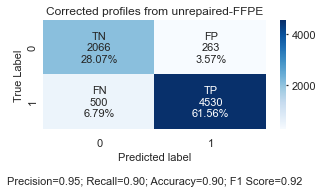

In [22]:
df_sig_activities_unrepaired_cp = df_sig_activities_unrepaired.copy()
cutoff = 0.1
df_sig_activities_unrepaired_cp['y_actual'] = 1
df_sig_activities_unrepaired_cp.loc[df_sig_activities_unrepaired_cp['True_activities'] <= cutoff, 'y_actual'] = 0

df_sig_activities_unrepaired_cp['y_corrected'] = 1
df_sig_activities_unrepaired_cp.loc[df_sig_activities_unrepaired_cp['Corrected'] <= cutoff, 'y_corrected'] = 0

df_sig_activities_unrepaired_cp['y_uncorrected'] = 1
df_sig_activities_unrepaired_cp.loc[df_sig_activities_unrepaired_cp['Uncorrected'] <= cutoff, 'y_uncorrected'] = 0
conf_matrix = confusion_matrix(df_sig_activities_unrepaired_cp['y_actual'],
                               df_sig_activities_unrepaired_cp['y_corrected'])
plot_confusion_matrix(conf_matrix, title = "Corrected profiles from unrepaired-FFPE", f = "./Figures/SFig9a.jpg")

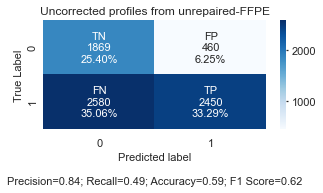

In [23]:
conf_matrix = confusion_matrix(df_sig_activities_unrepaired_cp['y_actual'],
                               df_sig_activities_unrepaired_cp['y_uncorrected'])
plot_confusion_matrix(conf_matrix, title = "Uncorrected profiles from unrepaired-FFPE", f = "./Figures/SFig9c.jpg")

### 2.2.2 For repaired FFPE

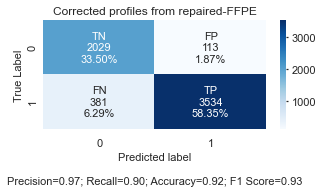

In [24]:
df_sig_activities_repaired_cp = df_sig_activities_repaired.copy()
df_sig_activities_repaired_cp['y_actual'] = 1
df_sig_activities_repaired_cp.loc[df_sig_activities_repaired_cp['True_activities'] < cutoff, 'y_actual'] = 0

df_sig_activities_repaired_cp['y_corrected'] = 1
df_sig_activities_repaired_cp.loc[df_sig_activities_repaired_cp['Corrected'] < cutoff, 'y_corrected'] = 0

df_sig_activities_repaired_cp['y_uncorrected'] = 1
df_sig_activities_repaired_cp.loc[df_sig_activities_repaired_cp['Uncorrected'] < cutoff, 'y_uncorrected'] = 0
conf_matrix = confusion_matrix(df_sig_activities_repaired_cp['y_actual'],
                               df_sig_activities_repaired_cp['y_corrected'])
plot_confusion_matrix(conf_matrix, title = "Corrected profiles from repaired-FFPE", f = "./Figures/SFig9b.jpg")

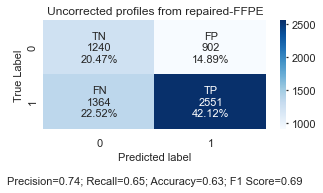

In [25]:
conf_matrix = confusion_matrix(df_sig_activities_repaired_cp['y_actual'],
                               df_sig_activities_repaired_cp['y_uncorrected'])
plot_confusion_matrix(conf_matrix, title = "Uncorrected profiles from repaired-FFPE", f = "./Figures/SFig9d.jpg")

## 2.3 Evaluation of inferred signature activities using relative contribution (unrepaired)

We measure the error of inferred activity proportions to the true values. We then compare whether the errors in corrected is greater than uncorrected FFPE profiles using one-sided wilcoxon test.

**Processing the data**

Add aetiology annotation to all signatures
+ For signatures with known aetiology we keep all of them
+ For signatures without known aetiology we annotate them using original SBS ID. We considered signature with n>20 samples.

In [26]:
def aetiology_annotation_and_preprocessing (data_tmp = df_sig_activities_unrepaired.copy()):

    data_tmp_aetiology = pd.DataFrame()
    ## annotate aetiology if the signatures have it.
    for aetiology in aetiology_list:
        aetiology_sig = sig_aetiology_dict.get(aetiology)
        aetiology_sig_ind = [sig in aetiology_sig for sig in 
                             data_tmp.Signatures]
        aetiology_sig_df = data_tmp.loc[aetiology_sig_ind,:].copy()
        aetiology_sig_df["aetiology"] = aetiology
        data_tmp_aetiology = pd.concat((data_tmp_aetiology, aetiology_sig_df))

    aetiology_sigs = data_tmp_aetiology['Signatures'].unique()

    ## Annotate "Others" to signatures without assigned aetiolog.

    other_sig_ind = [sig not in aetiology_sigs for sig in data_tmp.Signatures]
    other_sig_df = data_tmp.loc[other_sig_ind, :].copy()
    other_sig_df["aetiology"] = other_sig_df["Signatures"].values

    main_other_sigs = other_sig_df.groupby('aetiology').count().index[other_sig_df.groupby('Signatures').count()[
                                                                                            'Samples']>20]
    main_other_sigs_ind = [sig in main_other_sigs for sig in other_sig_df.Signatures]
    mainsig_df = other_sig_df.loc[main_other_sigs_ind,:].copy()

    data_aetiology_mainsig = pd.concat((data_tmp_aetiology, mainsig_df))

    
    aetiology_sigs_order = data_tmp_aetiology.groupby ("aetiology").mean().sort_values("error_of_uncorrected", 
                                                                                ascending = False).index.values

    other_main_sigs_order = mainsig_df.groupby ("aetiology").mean().sort_values("error_of_uncorrected", 
                                                                            ascending = False).index.values
    present_sig_order = list(aetiology_sigs_order) + list(other_main_sigs_order)
    width_of_patch = len(aetiology_sigs_order)/len(present_sig_order)
    
    xticks_text = []
    for sig_label in present_sig_order:
        if " " in sig_label:
            sig_label_new = sig_label.replace(" ", "\n")
    
            xticks_text.append(sig_label_new)
        else:
            xticks_text.append(sig_label)

    stats_present_sig_order = []
    max_error_present_sig_order = []

    for aetiology_tmp in present_sig_order:
        error_uncorrected = data_aetiology_mainsig['error_of_uncorrected'][data_aetiology_mainsig.aetiology == aetiology_tmp].values
        error_corrected =  data_aetiology_mainsig['error_of_corrected'][data_aetiology_mainsig.aetiology == aetiology_tmp].values

        r, p_epsilon = wilcoxon (error_corrected, error_uncorrected, alternative = "less")
        if p_epsilon < 0.001:
            p_label = "***"
        elif p_epsilon < 0.01 and p_epsilon > 0.001:
            p_label = "**"
        elif p_epsilon < 0.05 and p_epsilon > 0.01:
            p_label = "*"
        else:
            p_label = "ns"
    
        stats_present_sig_order.append(p_label)
        max_error_present_sig_order.append(np.mean(error_uncorrected) + 0.05)

    return (data_aetiology_mainsig, xticks_text, present_sig_order, width_of_patch,
            stats_present_sig_order,max_error_present_sig_order)

In [27]:
def scatterplot_main_fig3(data_tmp, aetiologies, name, file=False):
    data_aetiology_mainsig_melted = pd.melt(data_tmp, 
                                            id_vars = ['Samples','Signatures',"True_activities","aetiology"], 
                                            value_vars = ["Uncorrected", "Corrected"])

    f, axs = plt.subplots(1,4, figsize = (8,1.6), gridspec_kw={ 'wspace': 0.26})
    sns.set(style="whitegrid", color_codes=True, rc={"grid.linewidth": 1, 'grid.color': '.9', 
                                                 'ytick.major.size': 2,'axes.edgecolor': '.7'})

    for i, aetiology in enumerate(aetiologies):

        ax = axs[i]
        df_tmp = data_aetiology_mainsig_melted.loc[
                                                data_aetiology_mainsig_melted['aetiology'] == aetiology]
    
        sns.scatterplot(x = "True_activities", y = "value", hue = "variable", 
                        data = df_tmp, palette= {"Corrected":"tomato", "Uncorrected":"darkcyan"}, 
                        s = 25, alpha = 0.5,
                        style = "variable",markers=[ "v", "o"], ax = ax)

        if i > 0:
            t = aetiology + "\n(" + ", ".join(sig_aetiology_dict[aetiology]) + ")"
            ax.set_title(t, size = 11, color = "black",
                     bbox=dict(facecolor='silver', edgecolor='w', alpha = 0.4))
        else:
            ax.set_title("All signatures", size = 11, color = "black",
                     bbox=dict(facecolor='silver', edgecolor='w', alpha = 0.4))    
        if i == 0 :
            ax.set_ylabel("Inferred activity proportion", fontsize = 11, color = "black")
        else:
            ax.set_ylabel("")
        
        upper_limit = np.max(df_tmp.loc[:,[ "True_activities","value"]].values) * 1.5
        ax.set_xlim (-0.05, upper_limit)
        ax.set_ylim (-0.05, upper_limit)
    
        ax.tick_params(axis='both', which='major', labelsize = 9, color = "black")
        ax.plot([0, 1], [0, 1], transform = ax.transAxes, ls = "--", c = "black", alpha = 0.7)
        print (aetiology) 
        for tag in ["Uncorrected", "Corrected"]:
            x = df_tmp.loc[df_tmp["variable"] == tag]['True_activities'].values
            y = df_tmp.loc[df_tmp["variable"] == tag]['value'].values
            r, p = stats.pearsonr(x, y)
        
            print ("\t", tag, "(correlation):", r)
            if (tag == "Uncorrected"):
            
                contribution_change_uncorrected = np.absolute(x-y)
                e = np.mean(contribution_change_uncorrected)
                ax.annotate(f"ε = {e:.2f}", xy=(.1, .88),  xycoords = ax.transAxes, 
                            color = "darkcyan", size = 12)
            if (tag == "Corrected"):

                contribution_change_corrected = np.absolute(x-y)
                e = np.mean(contribution_change_corrected)
                ax.annotate(f"ε = {e:.2f}", xy=(.1, .75), xycoords = ax.transAxes,
                        color = "tomato", size = 12)
        ax.set_xlabel("True activity proportion",fontsize = 11, color = "black")
        if i == 2:
            handles, labels = ax.get_legend_handles_labels()
            ax.legend("", frameon = False)
        else:
            ax.legend("", frameon = False)
        if i == 3:
            ## Plot the label on right side
            left, width,  bottom, height = 1.003, 0.15, 0, 1
            right = left + width
            top = bottom + height
            ax = plt.gca()
            p = plt.Rectangle((left, bottom), width, height, fill=True, color = "silver",alpha = 0.4)
            p.set_transform(ax.transAxes)
            p.set_clip_on(False)
            ax.add_patch(p)
    
            ax.text(0.51 * (left + right), 0.5 * (bottom + top), name, color = 'black',size = 11,
                    horizontalalignment='center',verticalalignment='center',
                    transform=ax.transAxes , rotation = 90)
    
    axs[1].legend(handles = handles[1:] , labels=labels[1:],loc='upper center', 
                 bbox_to_anchor = (0.5, -0.4), shadow=False, ncol=2, frameon = False)
    if file:
        plt.savefig(file, bbox_inches = "tight", dpi = 300)
    plt.show()

In [28]:
def scatterplot_supp_fig7(data, other_aetiologie, name = "Unrepaired", file = False, del_last = False):
    
    data_aetiology_mainsig_melted = pd.melt(data, 
                                            id_vars = ['Samples','Signatures',"True_activities","aetiology"], 
                                            value_vars = ["Uncorrected", "Corrected"])
    
    sns.set(style="whitegrid", color_codes=True,
            rc={"grid.linewidth": 1, 'grid.color': '.9', 
            'ytick.major.size': 2,'axes.edgecolor': '.7'})

    nrow, ncol = 3, 6
    f, axs = plt.subplots(nrow,ncol, figsize = (12,6), gridspec_kw={ 'wspace': 0.3, 'hspace' : 0.6})
    
    fig_ind = []
    for i in range(nrow):
        for j in range(ncol):
            fig_ind.append((i,j))
    n = 0
    
    for i, sig in enumerate(other_aetiologies):

        ax = axs[fig_ind[n]]
        n += 1
        df_tmp = data_aetiology_mainsig_melted.loc[data_aetiology_mainsig_melted['aetiology'] == sig]
    
        sns.scatterplot(x = "True_activities", y = "value", hue = "variable", 
                        data = df_tmp, palette= {"Corrected":"tomato", "Uncorrected":"darkcyan"}, 
                        s = 25, alpha = 0.5,
                        style = "variable", markers=[ "v", "o"], ax = ax)
        t = sig
        ax.set_title(t, size = 12, color = "black",
                     bbox=dict(facecolor='silver', edgecolor='w', alpha = 0.4))
        if n > 12:
            ax.set_xlabel("True activity\nproportions",fontsize = 11, color = "black")
        else:
            ax.set_xlabel("")
    
        if n == 1 or n == 7 or n == 13:
            ax.set_ylabel("Inferred activity\nproportions", fontsize = 11, color = "black")
        else:
            ax.set_ylabel("")
        
        upper_limit = np.max(df_tmp.loc[:,[ "True_activities","value"]].values) * 1.5
        ax.set_xlim (-0.05, upper_limit)
        ax.set_ylim (-0.05, upper_limit)
    
        ax.plot([0, 1], [0, 1], transform = ax.transAxes, ls = "--", c = "black", alpha = 0.7)
    
        for tag in ["Uncorrected", "Corrected"]:
            x = df_tmp.loc[df_tmp["variable"] == tag]['True_activities'].values
            y = df_tmp.loc[df_tmp["variable"] == tag]['value'].values
        
            r, p = stats.pearsonr(x, y)
            if (tag == "Uncorrected"):
                contribution_change_uncorrected = np.absolute(x-y)
                e = np.mean(contribution_change_uncorrected)
                ax.annotate(f"ε = {e:.2f}", xy=(.1, .88),  xycoords = ax.transAxes, 
                            color = "darkcyan", size = 12)
            if (tag == "Corrected"):
                contribution_change_corrected = np.absolute(x-y)
                e = np.mean(contribution_change_corrected)
                ax.annotate(f"ε = {e:.2f}", xy=(.1, .75), xycoords = ax.transAxes,
                            color = "tomato", size = 12)
            
        if n == 17:
            handles, labels = ax.get_legend_handles_labels()
            ax.legend("", frameon = False)
        else:
            ax.legend("", frameon = False)
        
    axs[fig_ind[14]].legend(handles = handles[1:] , labels=labels[1:],loc='upper center', 
                 bbox_to_anchor = (0.5, -0.6), shadow=False, ncol=2, frameon = False)
    
    plt.suptitle (name, size = 13)
    if del_last == True:
        plt.delaxes(axs[fig_ind[17]])
        
    if file:
        plt.savefig(file, bbox_inches = "tight", dpi = 300)
    plt.show()

In [29]:
def bar_plot_main_fig3(data_tmp, present_sig_order,stats_present_sig_order, max_error_present_sig_order,
                      width_of_patch, ylim_max = .5, pos = 4, file = False, tag = "Unrepaired"):
    data_aetiology_mainsig_melted = pd.melt(data_tmp, 
                                            id_vars = ['Samples','Signatures',"True_activities","aetiology"], 
                                            value_vars = ["error_of_uncorrected", "error_of_corrected"])
    sns.catplot(x="aetiology", y="value", hue="variable", 
                data = data_aetiology_mainsig_melted,  height=2, aspect= 5,
                palette=['darkcyan','tomato'], order = present_sig_order,
                legend = None, kind = "bar", alpha = 0.8)

    ## adding stats
    length = len(stats_present_sig_order)
    for i in range(length):
        ## bottom pannel color bars 
        left, width = 0 + 1/length * i + 0.001, 1/length - 0.002        
        bottom, height = 1.12, 0.10
        right = left + width
        top = bottom + height
        ax = plt.gca()
        if stats_present_sig_order[i] == "ns":
            ax.text(0.5 * (left + right), max_error_present_sig_order[i] * pos, stats_present_sig_order[i], 
                color = "dimgrey", size = 13,
                horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
        else:
            ax.text(0.5 * (left + right), max_error_present_sig_order[i] * pos * 1.05, stats_present_sig_order[i], 
                color = "dimgrey", size = 15,
                horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

    ## adding subtitles
    patch_width = width_of_patch

    left, width,  bottom, height = 0, patch_width, 1.1, 0.2
    right = left + width
    top = bottom + height
    ax = plt.gca()
    p = plt.Rectangle((left, bottom), width, height, fill=True, color = "dimgrey",alpha = 0.3)
    p.set_transform(ax.transAxes)
    p.set_clip_on(False)
    ax.add_patch(p)
    ax.text(0.5 * (left + right), 0.5 * (bottom + top), "Signatures with known aetiology", 
            color = 'black',size = 12,
            horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)

    left, width,  bottom, height = patch_width, (1-patch_width), 1.1, 0.2
    right = left + width
    top = bottom + height
    ax = plt.gca()
    p = plt.Rectangle((left, bottom), width, height, fill=True, color = "dimgrey",alpha = 0.1)
    p.set_transform(ax.transAxes)
    p.set_clip_on(False)
    ax.add_patch(p)
    ax.text(0.5 * (left + right), 0.5 * (bottom + top), "Signatures without known aetiology", 
            color = 'black',size = 12,
            horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)
    
    ##### adding tag
    
    left, width,  bottom, height = 1.003, 0.02, 0, 1.1
    right = left + width
    top = bottom + height
    ax = plt.gca()
    p = plt.Rectangle((left, bottom), width, height, fill=True, color = "silver",alpha = 0.5)
    p.set_transform(ax.transAxes)
    p.set_clip_on(False)
    ax.add_patch(p)
    
    ax.text(0.5 * (left + right), 0.5 * (bottom + top), tag, color = 'black',size = 11,
                    horizontalalignment='center',verticalalignment='center',
                    transform=ax.transAxes , rotation = 90)
    ## legend
    handles, labels = ax.get_legend_handles_labels()    
    plt.legend(handles, ["Uncorrected", "Corrected"], bbox_to_anchor=(1.02, 1),
            frameon = False)

    plt.xticks (range(len(xticks_text)), xticks_text, rotation = 90, size = 11, 
            horizontalalignment='center')
    plt.xlabel("")
    plt.ylim(0, ylim_max)
    plt.ylabel("Error in\ninferred signature activity")
    if file:
        plt.savefig (file, bbox_inches = "tight", dpi = 300)
    plt.show()

In [30]:
def boxenplot_main_fig3(data, name = "Unrepaired", file = False):
    reconstruction_accuracy_melted = pd.melt(data,
                                                  value_vars = ["Biological",
                                                                "Corrected",
                                                                "Uncorrected"])
    f, ax = plt.subplots(figsize = (2.5,2.2))
    sns.boxenplot(x = "variable", y = "value", data = reconstruction_accuracy_melted,
                   hue = "variable", palette= {"Corrected":"tomato",
                                          "Uncorrected" : "darkcyan",
                                          "Biological":"grey"}, ax = ax)
    
    ## adding pvalue
    t, p2 = wilcoxon(data['Uncorrected'].values, data['Corrected'].values) ## difference test
    
    x1, x2 = 1.05, 2.3
    y, h, col = reconstruction_accuracy_melted['value'].max()+0.05, 0.02, 'black' 
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c = col)
    ax.text((x1 + x2) * .5, y + h + 0.03, 'p={0:1.1e}'.format(p2), ha='center', 
            va='bottom', color=col, size = 10)

    ##### adding name    
    left, width,  bottom, height = 0, 1, 1.03, 0.13
    right = left + width
    top = bottom + height
    ax = plt.gca()
    p = plt.Rectangle((left, bottom), width, height, fill=True, color = "silver",alpha = 0.5)
    p.set_transform(ax.transAxes)
    p.set_clip_on(False)
    ax.add_patch(p)    
    ax.text(0.5 * (left + right), 0.5 * (bottom + top), name, color = 'black',size = 11,
            horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    
    ## legend
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(loc = "lower left",handles = handles,
               labels = labels, frameon = False, fontsize = 11)
    ## labels
    plt.xticks([])
    plt.xlabel("Mutational profile\nused for signature refitting", color = 'black', size = 11)
    plt.ylabel("Reconstruction accuracy\nto true profiles", 
           color = 'black', size = 11)
    plt.ylim(0.2,1.2)
    plt.yticks([0.2, 0.4, 0.6,0.8,1.0],color = 'black', size = 10.5 )
    sns.despine()
    if file:
        plt.savefig(file, bbox_inches = "tight", dpi = 300)
    plt.show()

### 2.3.1 Results processing

We rank the the sigantures using mean of error from uncorrected profiles. But the rank is done seperately for signatures with known aetiology and without known aetiology.

In [31]:
data_aetiology_mainsig, xticks_text, present_sig_order, width_of_patch, stats_present_sig_order,max_error_present_sig_order = aetiology_annotation_and_preprocessing(df_sig_activities_unrepaired.copy())
stats_of_unrepaired_FFPE = data_aetiology_mainsig.groupby ("aetiology").mean().loc[present_sig_order,:]
stats_of_unrepaired_FFPE['sample_size'] = data_aetiology_mainsig.groupby ("aetiology").count().loc[present_sig_order,
                                                                                                   :]['Samples'].values
stats_of_unrepaired_FFPE['labels'] = stats_present_sig_order
stats_of_unrepaired_FFPE.head(2)

,True_activities,Uncorrected,Corrected,error_of_uncorrected,error_of_corrected,sample_size,labels
aetiology,,,,,,,
BER deficiency,0.15649,0.426091,0.124609,0.356676,0.050573,36,***
HR deficiency,0.34289,0.007792,0.489292,0.335098,0.157671,206,***


### 2.3.2 Scatterplot of true vs inferred signature activities
+ all signatures
+ a few selected signatures with known aetiology

We will show scatterplot of inference for all signatures and the few signatures (with known aetiology) as an example

all signatures
	 Uncorrected (correlation): 0.5811565237721281
	 Corrected (correlation): 0.8702500489041549
HR deficiency
	 Uncorrected (correlation): 0.19966122656214702
	 Corrected (correlation): 0.8490811607024964
BER deficiency
	 Uncorrected (correlation): 0.33279996099305664
	 Corrected (correlation): 0.9660340839996064
ROS damage
	 Uncorrected (correlation): 0.5649817726808524
	 Corrected (correlation): 0.9436467527011917


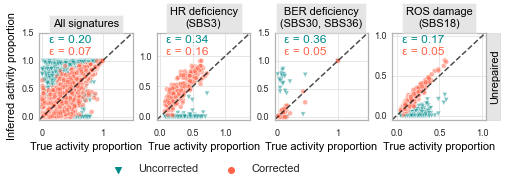

In [32]:
df_sig_activities_unrepaired_copy = df_sig_activities_unrepaired.copy()
df_sig_activities_unrepaired_copy['aetiology'] = "all signatures"
all_sig_aetiology_mainsig_df = pd.concat((df_sig_activities_unrepaired_copy, data_aetiology_mainsig))
unrepaired_main_aetiologies = ['all signatures', 'HR deficiency',  'BER deficiency', 'ROS damage']
scatterplot_main_fig3(all_sig_aetiology_mainsig_df, 
                      aetiologies = unrepaired_main_aetiologies,
                      name = "Unrepaired", file = "./Figures/Fig3a.pdf")

### 2.4.3 Barplot of errors of inferred signature activities

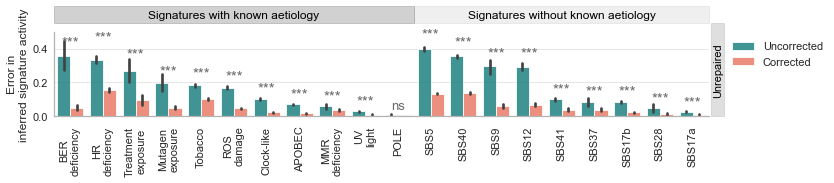

In [33]:
max_error_present_sig_order[1] = max_error_present_sig_order[1] + 0.05
max_error_present_sig_order[2] = max_error_present_sig_order[2] + 0.02
bar_plot_main_fig3(data_aetiology_mainsig, present_sig_order,stats_present_sig_order, 
                   max_error_present_sig_order, width_of_patch, ylim_max = .5, pos = 2.05,
                   tag = "Unrepaired", file = "./Figures/Fig3c.pdf")

### 2.4.4 Scatterplot of ture vs inferred signature activities
+ remaining signatures with known aetiology
+ remaining signatures without known aetiology

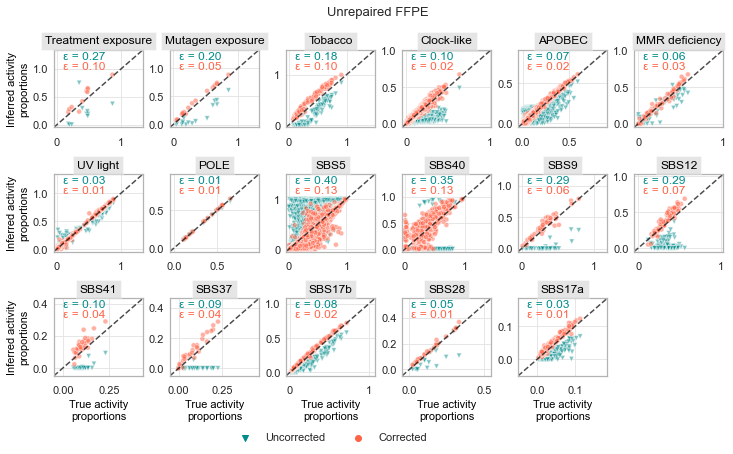

In [34]:
other_aetiologies = stats_of_unrepaired_FFPE.index.values[[i not in unrepaired_main_aetiologies for
                                       i in stats_of_unrepaired_FFPE.index.values]]
scatterplot_supp_fig7(data_aetiology_mainsig, other_aetiologies, 
                      "Unrepaired FFPE", "./Figures/SFig10a.pdf", del_last = True)

### 2.3.5 Reconstruction accuracy of corrected vs uncorrected profiles

In [35]:
reconstruction_accuracy_unrepaired = pd.DataFrame(
    {"Biological": reconstruction_accuracy_unrepaired_biological,
    "Corrected" : reconstruction_accuracy_unreparied_corrected,
    "Uncorrected": reconstruction_accuracy_unreparied_uncorrected})

reconstruction_accuracy_unrepaired.describe()

,Biological,Corrected,Uncorrected
count,1770.000000,1770.000000,1770.000000
mean,0.974024,0.967979,0.861793
std,0.017476,0.019421,0.075285
min,0.833179,0.828709,0.571541
25%,0.966950,0.957801,0.808645
50%,0.977078,0.970562,0.863992
75%,0.984650,0.980284,0.911365
max,0.999689,0.999674,0.999491


In [36]:
# normality test
for col in reconstruction_accuracy_unrepaired.columns:
    data = reconstruction_accuracy_unrepaired['Corrected'].values
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print(f'{col}\nlooks Gaussian (fail to reject H0)')
    else:
        print(f'{col}\ndoes not look Gaussian (reject H0)')

Statistics=0.938, p=0.000
Biological
does not look Gaussian (reject H0)
Statistics=0.938, p=0.000
Corrected
does not look Gaussian (reject H0)
Statistics=0.938, p=0.000
Uncorrected
does not look Gaussian (reject H0)


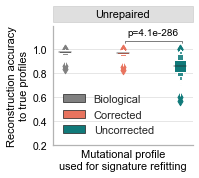

In [37]:
boxenplot_main_fig3(reconstruction_accuracy_unrepaired, name = "Unrepaired", file = "./Figures/Fig3e.pdf")

## 2.4 Evaluation of inferred signature activities using relative contribution (repaired)

### 2.4.1 Results processing

In [38]:
data_aetiology_mainsig, xticks_text, present_sig_order, width_of_patch, stats_present_sig_order,max_error_present_sig_order = aetiology_annotation_and_preprocessing(df_sig_activities_repaired.copy())
stats_of_repaired_FFPE = data_aetiology_mainsig.groupby ("aetiology").mean().loc[present_sig_order,:]
stats_of_repaired_FFPE['sample_size'] = data_aetiology_mainsig.groupby ("aetiology").count().loc[present_sig_order,
                                                                                                   :]['Samples'].values
stats_of_repaired_FFPE['labels'] = stats_present_sig_order
stats_of_repaired_FFPE.head(2)

,True_activities,Uncorrected,Corrected,error_of_uncorrected,error_of_corrected,sample_size,labels
aetiology,,,,,,,
HR deficiency,0.398319,0.092991,0.515059,0.305328,0.119792,208,***
Clock-like,0.099986,0.352855,0.059933,0.252891,0.046517,1294,***


### 2.4.2 Scatterplot of true vs inferred signature activities
+ all signatures
+ a few selected signatures with known aetiology

all signatures
	 Uncorrected (correlation): 0.41932005953489815
	 Corrected (correlation): 0.9234765898405219
Clock-like
	 Uncorrected (correlation): 0.634244808311127
	 Corrected (correlation): 0.9014885347376758
HR deficiency
	 Uncorrected (correlation): 0.6947340683337124
	 Corrected (correlation): 0.914721802059066
Treatment exposure
	 Uncorrected (correlation): 0.831944676966178
	 Corrected (correlation): 0.9967295704571928


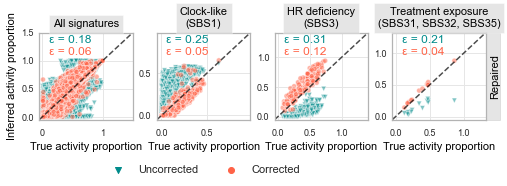

In [39]:
df_sig_activities_repaired_copy = df_sig_activities_repaired.copy()
df_sig_activities_repaired_copy['aetiology'] = "all signatures"

all_sig_aetiology_mainsig_df = pd.concat((df_sig_activities_repaired_copy, data_aetiology_mainsig))
repaired_main_aetiologies = ['all signatures', 'Clock-like','HR deficiency', 'Treatment exposure']
scatterplot_main_fig3(all_sig_aetiology_mainsig_df, 
                      aetiologies = repaired_main_aetiologies,
                      name = "Repaired", file = "./Figures/Fig3b.pdf")

### 2.4.3 Barplot of errors of inferred signature activities

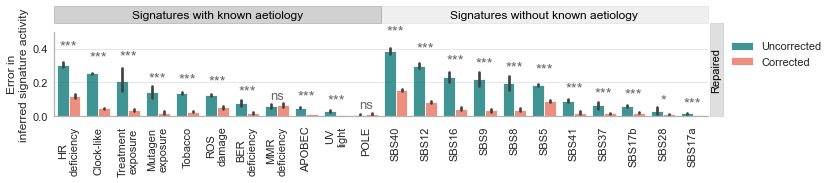

In [40]:
max_error_present_sig_order[2] = max_error_present_sig_order[2] + 0.05
bar_plot_main_fig3(data_aetiology_mainsig, present_sig_order,stats_present_sig_order, 
                   max_error_present_sig_order, width_of_patch, ylim_max = .5, pos = 2.2,
                   tag = "Repaired", file = "./Figures/Fig3d.pdf")

### 2.4.4 Scatterplot of ture vs inferred signature activities
+ remaining signatures with known aetiology
+ remaining signatures without known aetiology

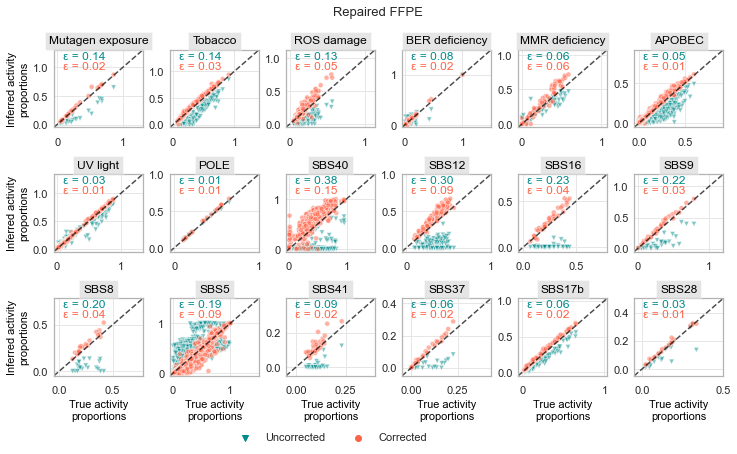

In [41]:
other_aetiologies = stats_of_repaired_FFPE.index.values[[i not in repaired_main_aetiologies for
                                       i in stats_of_repaired_FFPE.index.values]][:18]
scatterplot_supp_fig7(data_aetiology_mainsig, other_aetiologies, "Repaired FFPE",
                      "./Figures/SFig10b.pdf")

### 2.4.5 Reconstruction accuracy of corrected vs uncorrected profiles

In [42]:
reconstruction_accuracy_repaired = pd.DataFrame(
    {"Biological": reconstruction_accuracy_repaired_biological,
     "Corrected" : reconstruction_accuracy_reparied_corrected,
     "Uncorrected": reconstruction_accuracy_reparied_uncorrected})

reconstruction_accuracy_repaired.describe()

,Biological,Corrected,Uncorrected
count,1462.000000,1462.000000,1462.000000
mean,0.971872,0.956760,0.774046
std,0.019242,0.025580,0.155128
min,0.833179,0.807408,0.304892
25%,0.963180,0.942074,0.629455
50%,0.975162,0.958764,0.789722
75%,0.984210,0.973932,0.914165
max,0.999690,0.999695,0.999271


In [43]:
# normality test
for col in reconstruction_accuracy_repaired.columns:
    data = reconstruction_accuracy_repaired['Corrected'].values
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print(f'{col}\nlooks Gaussian (fail to reject H0)')
    else:
        print(f'{col}\ndoes not look Gaussian (reject H0)')

Statistics=0.963, p=0.000
Biological
does not look Gaussian (reject H0)
Statistics=0.963, p=0.000
Corrected
does not look Gaussian (reject H0)
Statistics=0.963, p=0.000
Uncorrected
does not look Gaussian (reject H0)


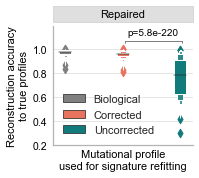

In [44]:
boxenplot_main_fig3(reconstruction_accuracy_repaired, name = "Repaired", 
                    file = "./Figures/Fig3f.pdf")